# Machine Learning

**Chargement des packages habituels et de la table préparée.**

In [6]:
import numpy as np
import pandas as pd
Final_1=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/Final_1_corrt.csv")

In [7]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346812 entries, 0 to 346811
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   IncidentNumber                        346812 non-null  object 
 1   CalYear                               346812 non-null  int64  
 2   HourOfCall                            346812 non-null  int64  
 3   IncidentGroup                         346812 non-null  int64  
 4   TravelTimeSeconds                     346812 non-null  float64
 5   DateOfCall_bis                        346812 non-null  object 
 6   MinuteOfCall                          346812 non-null  int64  
 7   DelayCodeId_bis                       346812 non-null  float64
 8   Joursem                               346812 non-null  int64  
 9   mois                                  346812 non-null  int64  
 10  jour                                  346812 non-null  int64  
 11  

**Test de Suppression de trois variables qui ne devraient pas avoir d'impact sur le MachineLearning.**

In [9]:
Final_1test=Final_1.drop(['IncidentNumber','DateOfCall_bis','DelayCodeId_bis'], axis=1)

**Test pour déterminer le nombre de clusters optimal.**

In [10]:
Final_1test=Final_1test.dropna()
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
range_n_clusters=range(2,40)
distorsions=[]
for n_clusters in range_n_clusters:
    cluster=KMeans(n_clusters=n_clusters)
    cluster.fit(Final_1test)
    distorsions.append(sum(np.min(cdist(Final_1test,cluster.cluster_centers_,'euclidean'),axis=1))/np.size(Final_1test,axis=0))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


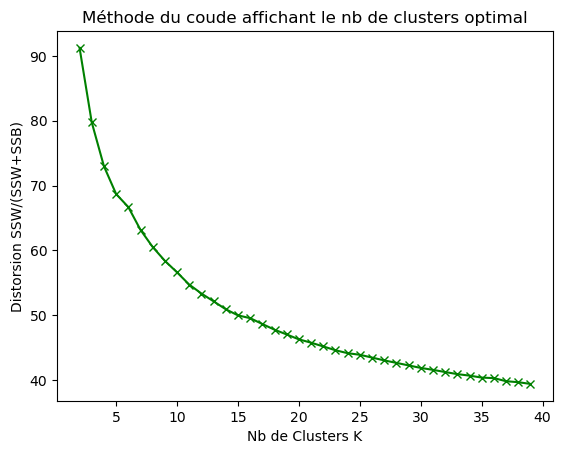

In [11]:
import matplotlib.pyplot as plt
plt.plot(range_n_clusters,distorsions,'gx-')
plt.xlabel('Nb de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nb de clusters optimal')
plt.show();

**5 classes semblent pertinentes. Calcul des centroids.**

In [12]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(Final_1test)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Représentation graphique des durées par année selon 5 classes.**

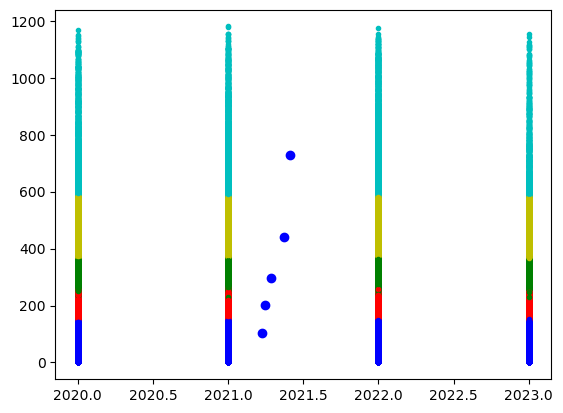

In [32]:
colors=['g.','r.','c.','y.','b.']
for i in range(len(Final_1test)):
    plt.plot(Final_1test.iloc[i,0],Final_1test.iloc[i,3],colors[labels[i]])
plt.scatter(centroids[:,0],centroids[:,3],color='blue')
plt.show();

**Création de la variable 'Class_duree' qui découpe la variable cible 'TravelTimeSeconds' en 5 classes.**

In [14]:
Final_1['Class_duree']=pd.qcut(Final_1['TravelTimeSeconds'],5,labels =[1,2,3,4,5])
Final_1.head()

,IncidentNumber,CalYear,HourOfCall,IncidentGroup,TravelTimeSeconds,DateOfCall_bis,MinuteOfCall,DelayCodeId_bis,Joursem,mois,...,COVID (fermeture ecoles),distance,average_time_of_arrival_Station_Hour,average_time_of_arrival_Borough_Hour,tempmax,tempmin,temp,precip,snow,Class_duree
0,000003-01012020,2020,0,2,246.0,2020-01-01,6,12.0,2,1,...,0,1.295103,247.809917,272.927114,7.0,2.7,5.4,0.001,0.0,3
1,000037-01012020,2020,0,2,255.0,2020-01-01,27,9.0,2,1,...,0,2.048409,247.735537,272.900875,7.0,2.7,5.4,0.001,0.0,4
2,000177-01012020,2020,4,2,236.0,2020-01-01,56,12.0,2,1,...,0,2.884629,268.232877,282.379630,7.0,2.7,5.4,0.001,0.0,3
3,000206-01012020,2020,7,1,204.0,2020-01-01,13,12.0,2,1,...,0,2.367860,267.365385,280.375000,7.0,2.7,5.4,0.001,0.0,3
4,000294-01012020,2020,12,3,1.0,2020-01-01,40,12.0,2,1,...,0,0.075857,289.010695,308.286656,7.0,2.7,5.4,0.001,0.0,1


In [15]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346812 entries, 0 to 346811
Data columns (total 23 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   IncidentNumber                        346812 non-null  object  
 1   CalYear                               346812 non-null  int64   
 2   HourOfCall                            346812 non-null  int64   
 3   IncidentGroup                         346812 non-null  int64   
 4   TravelTimeSeconds                     346812 non-null  float64 
 5   DateOfCall_bis                        346812 non-null  object  
 6   MinuteOfCall                          346812 non-null  int64   
 7   DelayCodeId_bis                       346812 non-null  float64 
 8   Joursem                               346812 non-null  int64   
 9   mois                                  346812 non-null  int64   
 10  jour                                  346812 non-null  i

**Suppression des variables qui ne seront pas utilisées et des NA.**

In [16]:
Final_1=Final_1.drop(['TravelTimeSeconds','IncidentNumber','DateOfCall_bis','DelayCodeId_bis'], axis=1)
Final_1=Final_1.dropna()
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346811 entries, 0 to 346811
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   CalYear                               346811 non-null  int64   
 1   HourOfCall                            346811 non-null  int64   
 2   IncidentGroup                         346811 non-null  int64   
 3   MinuteOfCall                          346811 non-null  int64   
 4   Joursem                               346811 non-null  int64   
 5   mois                                  346811 non-null  int64   
 6   jour                                  346811 non-null  int64   
 7   jour ferie                            346811 non-null  int64   
 8   vacances                              346811 non-null  int64   
 9   COVID (fermeture ecoles)              346811 non-null  int64   
 10  distance                              346811 non-null  f

**Preprocessing et découpage de la table en data et target.**

In [17]:
from sklearn import linear_model,preprocessing
from sklearn.model_selection import train_test_split

In [18]:
data=Final_1.drop(['Class_duree'], axis=1)
target=Final_1['Class_duree']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=66)

In [20]:
X_train_scaled=preprocessing.scale(X_train)
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
scaler=preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler.transform(X_test)

In [21]:
from sklearn import neighbors,model_selection,ensemble,svm

In [22]:
knn=neighbors.KNeighborsClassifier()
parametres={'n_neighbors':range(2,40)}
grid_knn=model_selection.GridSearchCV(estimator=knn,param_grid=parametres)
grid_knn.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40)})

In [23]:
print('Meilleurs paramètres:',grid_knn.best_params_)
print(grid_knn.score(X_test_scaled,y_test))
y_pred=grid_knn.predict(X_test_scaled)
pd.crosstab(y_test,y_pred,rownames=['Classe réelle'], colnames=['Classe prédite'])

Meilleurs paramètres: {'n_neighbors': 37}
0.252425644796217


Classe prédite,1,2,3,4,5
Classe réelle,,,,,
1,4178,3373,2289,1765,2298
2,3870,3276,2334,1958,2363
3,3442,2947,2357,2270,2785
4,2847,2582,2350,2503,3764
5,2007,1992,2034,2584,5195


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.30      0.26      0.28     16344
           2       0.24      0.23      0.23     14170
           3       0.17      0.21      0.19     11364
           4       0.18      0.23      0.20     11080
           5       0.38      0.32      0.34     16405

    accuracy                           0.25     69363
   macro avg       0.25      0.25      0.25     69363
weighted avg       0.26      0.25      0.26     69363



In [25]:
rf=ensemble.RandomForestClassifier()
grid_rf=model_selection.GridSearchCV(estimator=rf, param_grid={'max_features':["squrt","log2",None]})
grid_rf.fit(X_train_scaled,y_train)
grid_rf.best_params_
print(grid_rf.score(X_test_scaled,y_test))
y_pred_rf=grid_rf.predict(X_test_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-packages\

0.42485186626876


In [26]:
pd.crosstab(y_test,y_pred_rf,rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5
Classe réelle,,,,,
1,7753,3451,1356,710,633
2,3126,4892,3398,1628,757
3,1375,3291,3899,3486,1750
4,667,1638,3004,4441,4296
5,439,795,1384,2710,8484


In [27]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           1       0.56      0.58      0.57     13360
           2       0.35      0.35      0.35     14067
           3       0.28      0.30      0.29     13041
           4       0.32      0.34      0.33     12975
           5       0.61      0.53      0.57     15920

    accuracy                           0.42     69363
   macro avg       0.43      0.42      0.42     69363
weighted avg       0.43      0.42      0.43     69363



In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [29]:
dtc=DecisionTreeClassifier()
ac=AdaBoostClassifier(base_estimator=dtc,n_estimators=400)
ac.fit(X_train_scaled,y_train)
ac.score(X_test_scaled,y_test)
y_pred_ac=ac.predict(X_test_scaled)
pd.crosstab(y_test,y_pred_ac,rownames=['Classe réelle'], colnames=['Classe prédite'])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classe prédite,1,2,3,4,5
Classe réelle,,,,,
1,5539,3603,2276,1416,1069
2,2967,3774,3313,2275,1472
3,1799,2825,3408,3350,2419
4,1166,1924,2911,3906,4139
5,924,1188,1897,3044,6759


In [30]:
ac.score(X_test_scaled,y_test)

0.33715381399305105

In [31]:
print(classification_report(y_pred_ac, y_test))

              precision    recall  f1-score   support

           1       0.40      0.45      0.42     12395
           2       0.27      0.28      0.28     13314
           3       0.25      0.25      0.25     13805
           4       0.28      0.28      0.28     13991
           5       0.49      0.43      0.46     15858

    accuracy                           0.34     69363
   macro avg       0.34      0.34      0.34     69363
weighted avg       0.34      0.34      0.34     69363



In [ ]:
svm_clf=svm.SVR(kernel = 'poly')
svm_clf.fit(X_train_scaled,y_train)
print(svm_clf.score(X_test_scaled,y_test))
y_pred_svm=svm_clf.predict(X_test_scaled)

In [26]:
pd.crosstab(y_test,y_pred_svm,rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1.057684,1.082955,1.083256,1.114872,1.140487,1.148500,1.151674,1.153775,1.165120,1.173224,...,12.221686,12.516451,12.562833,12.806262,12.810607,13.010526,13.041415,13.181724,13.771607,13.953106
Classe réelle,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1


In [25]:
print(classification_report(y_pred_svm, y_test))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [1]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/shap/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/shap/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shap (from versions: none)
ERROR: No matching distribution found for shap


In [1]:
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host anaconda.org pip geopy

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
conda install -c conda-forge shap


Note: you may need to restart the kernel to use updated packages.



CondaSSLError: Encountered an SSL error. Most likely a certificate verification issue.

Exception: HTTPSConnectionPool(host='conda.anaconda.org', port=443): Max retries exceeded with url: /conda-forge/win-64/current_repodata.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))




In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values[0], X_test)

In [ ]:
shap.dependence_plot("Subscription Length", shap_values[0], X_test,interaction_index="Age")

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

In [ ]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)